대한민국 (South Korea) 관련 데이터 확인

In [1]:
import pandas as pd

df_2022 = pd.read_csv("datasets/2022.csv", sep=",")
df_2022.columns = df_2022.columns.str.lower()
print(f"2022: {df_2022.columns.tolist()}\n")

df_2021 = pd.read_csv("datasets/2021.csv", sep=",")
df_2021.columns = df_2021.columns.str.lower()
print(f"2021: {df_2021.columns.tolist()}\n")

df_2020 = pd.read_csv("datasets/2020.csv", sep=",")
df_2020.columns = df_2020.columns.str.lower()
print(f"2020: {df_2020.columns.tolist()}\n")

df_2019 = pd.read_csv("datasets/2019.csv", sep=",")
df_2019.columns = df_2019.columns.str.lower()
print(f"2019: {df_2019.columns.tolist()}\n")

df_2018 = pd.read_csv("datasets/2018.csv", sep=",")
df_2018.columns = df_2018.columns.str.lower()
print(f"2018: {df_2018.columns.tolist()}\n")

df_2017 = pd.read_csv("datasets/2017.csv", sep=",")
df_2017.columns = df_2017.columns.str.lower()
print(f"2017: {df_2017.columns.tolist()}\n")

df_2016 = pd.read_csv("datasets/2016.csv", sep=",")
df_2016.columns = df_2016.columns.str.lower()
print(f"2016: {df_2016.columns.tolist()}\n")

df_2015 = pd.read_csv("datasets/2015.csv", sep=",")
df_2015.columns = df_2015.columns.str.lower()
print(f"2015: {df_2015.columns.tolist()}")

2022: ['rank', 'country', 'happiness score', 'whisker-high', 'whisker-low', 'dystopia (1.83) + residual', 'explained by: gdp per capita', 'explained by: social support', 'explained by: healthy life expectancy', 'explained by: freedom to make life choices', 'explained by: generosity', 'explained by: perceptions of corruption']

2021: ['country name', 'regional indicator', 'ladder score', 'standard error of ladder score', 'upperwhisker', 'lowerwhisker', 'logged gdp per capita', 'social support', 'healthy life expectancy', 'freedom to make life choices', 'generosity', 'perceptions of corruption', 'ladder score in dystopia', 'explained by: log gdp per capita', 'explained by: social support', 'explained by: healthy life expectancy', 'explained by: freedom to make life choices', 'explained by: generosity', 'explained by: perceptions of corruption', 'dystopia + residual']

2020: ['country name', 'regional indicator', 'ladder score', 'standard error of ladder score', 'upperwhisker', 'lowerwhis

---

특정 국가의 특정 항목들만 불러오기  

- Country: South Korea  
- Features: Score, Economy, Health, Freedom

In [2]:
def find_column(df, to_contain):
    mask = df.columns.str.contains(to_contain)
    col_name = df.columns[mask].values[0]
    return col_name

def get_kor_values(df):
    country = find_column(df, "country")
    score = find_column(df, "score")
    gdp = find_column(df, "gdp")
    health = find_column(df, "health")
    freedom = find_column(df, "freedom")
    df_kor = df.loc[df[country] == "South Korea", [score, gdp, health, freedom]]
    values = df_kor.values.flatten().tolist()
    return values

In [3]:
kor_2022 = get_kor_values(df_2022)
kor_2021 = get_kor_values(df_2021)
kor_2020 = get_kor_values(df_2020)
kor_2019 = get_kor_values(df_2019)
kor_2018 = get_kor_values(df_2018)
kor_2017 = get_kor_values(df_2017)
kor_2016 = get_kor_values(df_2016)
kor_2015 = get_kor_values(df_2015)

In [4]:
import numpy as np

values = [kor_2015, kor_2016, kor_2017, kor_2018, kor_2019, kor_2020, kor_2021, kor_2022]
index_names = np.arange(2015, 2023).astype(np.str_)

df_kor = pd.DataFrame(values, index=index_names)
df_kor.columns = ["Score", "Economy", "Health", "Freedom"]
df_kor

,Score,Economy,Health,Freedom
2015,5.984,1.24461,0.96538,0.33208
2016,5.835,1.35948,0.88645,0.25168
2017,5.838,1.401678,0.900214,0.257922
2018,5.875,1.266,0.955,0.244
2019,5.895,1.301,1.036,0.159
2020,5.8724,10.510567,73.60273,0.612965
2021,5.845,10.651,73.9,0.672
2022,"5,935","1,851","0,841","0,414"


2022년 데이터의 소수점을 ,(쉼표)에서 .(마침표)로 변경

In [5]:
def format_float(values):
    try:
        values = np.array(values).astype(np.float_)
    except ValueError:
        for i, elem in enumerate(values):
            values[i] = str(elem).replace(",", ".")
        values = np.array(values).astype(np.float_)
    return values

values = df_kor.iloc[-1, :].tolist()
df_kor.iloc[-1, :] = format_float(values)

In [6]:
def find_min_max(df, col):
    try:
        min = df[col].astype(np.float_).min()
        max = df[col].astype(np.float_).max()
    except ValueError:
        values = format_float(df[col].values)
        min = values.astype(np.float_).min()
        max = values.astype(np.float_).max()
    return min, max

minmax_gdp = list()
minmax_health = list()
for df in [df_2022, df_2021, df_2020, df_2019, df_2018, df_2017, df_2016, df_2015]:
    col_gdp = find_column(df, "gdp")
    col_health = find_column(df, "health")
    minmax_gdp.append(find_min_max(df, col_gdp))
    minmax_health.append(find_min_max(df, col_health))

print("GDP:")
for mm in minmax_gdp:
    print(f"{mm[0]:04.2f}, {mm[1]:04.2f}")
print("\nHealth:")
for mm in minmax_health:
    print(f"{mm[0]:04.2f}, {mm[1]:04.2f}")

GDP:
0nan, 0nan
6.63, 11.65
6.49, 11.45
0.00, 1.68
0.00, 2.10
0.00, 1.87
0.00, 1.82
0.00, 1.69

Health:
0nan, 0nan
48.48, 76.95
45.20, 76.80
0.00, 1.14
0.00, 1.03
0.00, 0.95
0.00, 0.95
0.00, 1.03


데이터 시각화

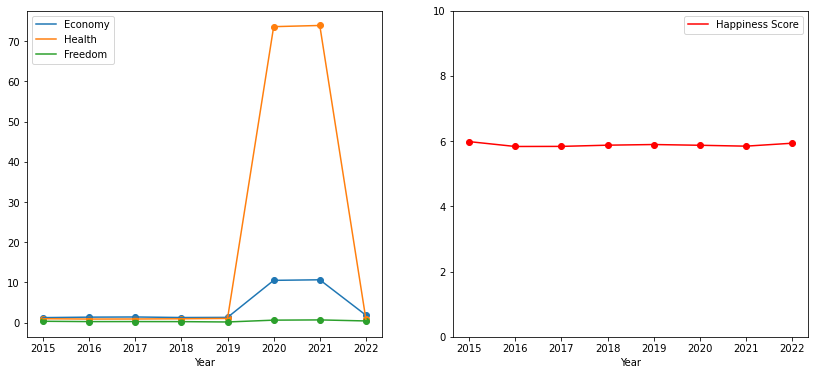

In [7]:
import matplotlib.pyplot as plt

years = df_kor.index
cols = df_kor.columns

plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.2)
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for col in cols[1:]:
    value = df_kor[col].values.flatten().tolist()
    ax1.scatter(years, value)
    ax1.plot(years, value, label=col)
ax1.set_xlabel("Year")
ax1.legend()

scores = df_kor["Score"].values.flatten().tolist()
ax2.scatter(years, scores, color="r")
ax2.plot(years, scores, label="Happiness Score", color="r")
ax2.set_ylim([0, 10])
ax2.set_xlabel("Year")
ax2.legend()

plt.show()

2020과 2021의 일부 값이 비정상적으로 큼  
--> 평가 척도가 다른 연도와 다를 수 있음

**korea.ipynb에서 분석 진행**